In [1]:
import pandas as pd
import numpy as np
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt

import pickle

In [2]:
import funcs_2d_thermal as f2dt

In [3]:
n=11
L=1
T=0.1
h=L/(n-1)

kurant=0.25
tau=kurant*(h**2)


### 2D

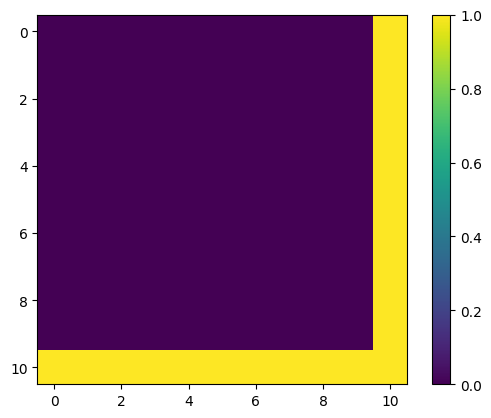

In [4]:
v=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        if i==n-1 or j==n-1:
            v[i][j]=1

plt.imshow(v)
plt.colorbar()

In [5]:
# Конечн-разн схема
my_v_2=np.array(f2dt.generate_data(True,v,T,L,kurant,h,n,CUSTOM_TAU=tau,save_flg=False)[0])

tau = 0.0025000000000000005
Генерация данных
v_fact.shape = 11 11


In [6]:
my_v_2.shape

(11, 11, 41)

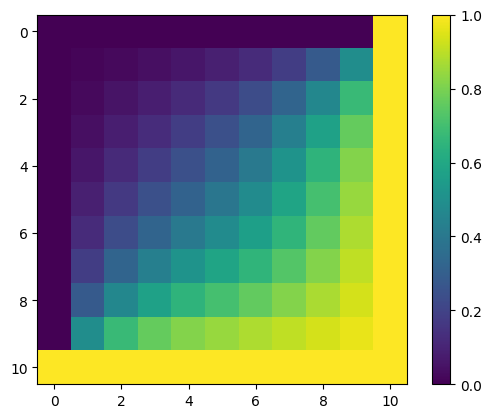

In [7]:
plt.imshow(my_v_2[:,:,-1])
plt.colorbar()

### Сравнение решений с помощью графиков 2D

In [8]:
my_v_2.shape

(11, 11, 41)

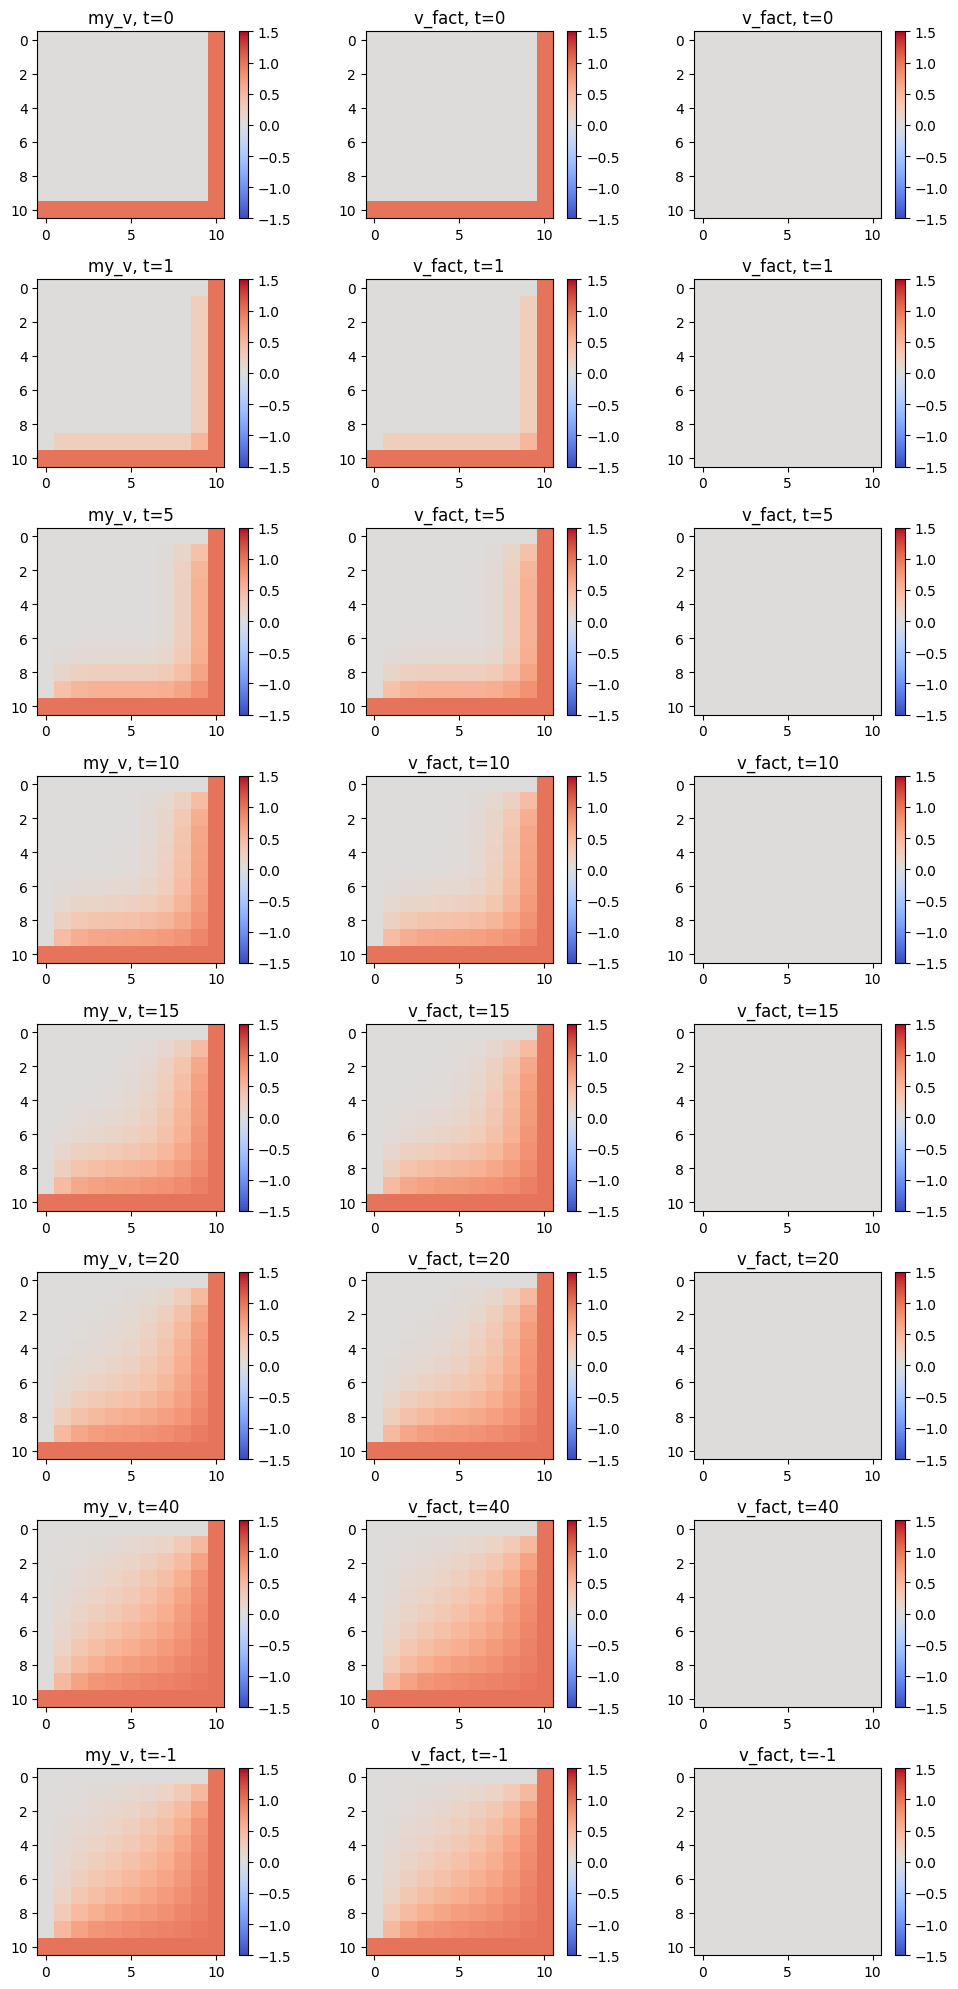

In [10]:
t_id=[0,1,5,10,15,20,40,-1]
plt.figure(figsize=(10, 20))
for i, t in enumerate(t_id):
    # Первый столбец графиков (my_v) - позиции 1, 3, 5, 7
    plt.subplot(len(t_id), 3, 3*i + 1)
    # plt.imshow(my_v[t, :, :])
    plt.imshow(my_v_2[:, :, t],cmap='coolwarm',vmin=-1.5,vmax=1.5)
    plt.colorbar()
    plt.title(f"my_v, t={t}")
    
    # Второй столбец графиков (v_fact) - позиции 2, 4, 6, 8
    plt.subplot(len(t_id), 3, 3*i + 2)
    # plt.imshow(v_fact[:, :, t],cmap='coolwarm',vmin=-1,vmax=1)
    plt.imshow(my_v_2[:, :, t],cmap='coolwarm',vmin=-1.5,vmax=1.5)
    plt.colorbar()
    plt.title(f"v_fact, t={t}")

    # Разность
    plt.subplot(len(t_id), 3, 3*i + 3)
    plt.imshow(my_v_2[:, :, t]-my_v_2[:, :, t],cmap='coolwarm',vmin=-1.5,vmax=1.5)
    plt.colorbar()
    plt.title(f"v_fact, t={t}")

plt.tight_layout()  # Чтобы избежать наложения подписей
plt.show()

In [11]:
pickle.dump(my_v_2,open('2d_advection_fact_2var.pkl','wb'))

In [ ]:
assert 1==2, 'stop point'

### Другое решение

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Параметры сетки
# Nx, Ny = 50, 50  # Размер сетки
# Lx, Ly = 1.0, 1.0  # Физические размеры области
# dx, dy = Lx / Nx, Ly / Ny  # Шаги сетки

# # Скорости адвекции (двигаем по диагонали)
# a, b = 0.5, 0.5  # Увеличим скорости для лучшей визуализации

# # Временные параметры
# T = 10  # Общее время
# dt = 0.1  # Шаг по времени
# Nt = int(T / dt)  # Число шагов

# # Начальное условие: квадрат из единиц в левом верхнем углу
# u = np.zeros((Nx, Ny))
# square_size = 10  # Размер квадрата
# u[:square_size, :square_size] = 1.0  # Квадрат 10x10 в углу

# # Настройка графика
# plt.figure(figsize=(8, 6))
# img = plt.imshow(u, cmap='coolwarm', origin='lower', extent=[0, Lx, 0, Ly])
# plt.colorbar(label='Значение u')
# plt.title("Адвекция квадрата")
# plt.xlabel('x')
# plt.ylabel('y')

# # Пошаговая анимация
# for step in range(10):
#     new_u = np.zeros_like(u)
    
#     # Применяем адвекцию (схема "верхнего потока")
#     for i in range(Nx):
#         for j in range(Ny):
#             # Вычисляем новые индексы с учётом границ
#             i_prev = max(0, i - int(a * dt / dx))
#             j_prev = max(0, j - int(b * dt / dy))
#             new_u[i, j] = u[i_prev, j_prev]
    
#     u = new_u  # Обновляем поле
    
#     # Обновляем изображение
#     # img.set_array(u)
#     plt.title(f'Адвекция квадрата, t = {step * dt:.1f}')
#     # plt.draw()
#     plt.imshow(u,cmap='coolwarm')
#     plt.colorbar()
#     plt.show() 
#     plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def upwind_2d(q, u, v, dx, dy, dt):
    """Реализация upwind-схемы для 2D адвекции"""
    q_new = np.zeros_like(q)
    
    # Внутренние точки (1:-1 для исключения границ)
    if u > 0:
        q_x = (q[1:-1, 1:-1] - q[1:-1, :-2]) / dx
    else:
        q_x = (q[1:-1, 2:] - q[1:-1, 1:-1]) / dx
        
    if v > 0:
        q_y = (q[1:-1, 1:-1] - q[:-2, 1:-1]) / dy
    else:
        q_y = (q[2:, 1:-1] - q[1:-1, 1:-1]) / dy
    
    q_new[1:-1, 1:-1] = q[1:-1, 1:-1] - u * dt * q_x - v * dt * q_y
    
    return q_new

def apply_dirichlet_bc(q):
    """Граничные условия Дирихле (q=0 на границах)"""
    q[0, :] = 0   # нижняя граница
    q[-1, :] = 0  # верхняя граница
    q[:, 0] = 0   # левая граница
    q[:, -1] = 0  # правая граница
    return q

# Параметры задачи
Lx, Ly = 1.0, 1.0  # размеры области
Nx, Ny = 100, 100  # число узлов
dx, dy = Lx/(Nx-1), Ly/(Ny-1)  # шаги сетки

# Скорости адвекции
u, v = 0.5, 0.8  # скорости по x и y

# Временные параметры
T = 1.0  # общее время
CFL = 0.5  # число Куранта
dt = CFL * min(dx/abs(u), dy/abs(v))  # шаг по времени
Nt = int(T/dt)  # число шагов

# Создание сетки
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Начальное условие - квадрат (прямоугольная область)
def square_initial(x, y, x1=0.01, x2=0.1, y1=0.01, y2=0.1):
    """Создает квадрат с единицами внутри и нулями снаружи"""
    q = np.zeros_like(x)
    q[(x >= x1) & (x <= x2) & (y >= y1) & (y <= y2)] = 1.0
    return q

q = square_initial(X, Y)
q = apply_dirichlet_bc(q)  # начальные граничные условия

# Создание анимации
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(q, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
plt.colorbar(im, label='Концентрация q')
ax.set_title('2D адвекция квадратного импульса')

def update(frame):
    global q
    for _ in range(10):  # Обновляем 10 шагов за кадр для ускорения анимации
        q = upwind_2d(q, u, v, dx, dy, dt)
        q = apply_dirichlet_bc(q)
    im.set_array(q)
    ax.set_title(f'2D адвекция (t = {frame*10*dt:.2f} сек)')
    return im,

ani = FuncAnimation(fig, update, frames=range(Nt//10), blit=True, interval=50)
plt.close()


# Дополнительно: финальный кадр
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, square_initial(X, Y), levels=10, cmap='viridis')
plt.colorbar()
plt.title("Начальное условие (квадрат)")

plt.subplot(1, 2, 2)
plt.contourf(X, Y, q, levels=10, cmap='viridis')
plt.colorbar()
plt.title(f"Решение после {T} секунд")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def upwind_2d(q, u, v, dx, dy, dt):
    """Реализация upwind-схемы для 2D адвекции"""
    q_new = np.zeros_like(q)
    
    if u > 0:
        q_x = (q[1:-1, 1:-1] - q[1:-1, :-2]) / dx
    else:
        q_x = (q[1:-1, 2:] - q[1:-1, 1:-1]) / dx
        
    if v > 0:
        q_y = (q[1:-1, 1:-1] - q[:-2, 1:-1]) / dy
    else:
        q_y = (q[2:, 1:-1] - q[1:-1, 1:-1]) / dy
    
    q_new[1:-1, 1:-1] = q[1:-1, 1:-1] - u * dt * q_x - v * dt * q_y
    
    return q_new

def apply_dirichlet_bc(q):
    """Граничные условия Дирихле (q=0 на границах)"""
    q[0, :] = 0; q[-1, :] = 0; q[:, 0] = 0; q[:, -1] = 0
    return q

def exact_solution(x, y, t, u, v, Lx, Ly):
    """Точное решение - перенос начального условия со скоростью (u,v)"""
    # Новые координаты с учетом переноса
    x0 = (x - u*t) % Lx
    y0 = (y - v*t) % Ly
    
    # Создаем квадрат в новых координатах
    q_exact = np.zeros_like(x0)
    mask = (x0 >= 0.3) & (x0 <= 0.7) & (y0 >= 0.3) & (y0 <= 0.7)
    q_exact[mask] = 1.0
    
    # Применяем граничные условия (0 на границах)
    q_exact[0, :] = 0; q_exact[-1, :] = 0
    q_exact[:, 0] = 0; q_exact[:, -1] = 0
    
    return q_exact

# Параметры задачи
Lx, Ly = 2.0, 2.0
Nx, Ny = 100, 100
dx, dy = Lx/(Nx-1), Ly/(Ny-1)
u, v = 0.5, 0.8

# Временные параметры
T = 1.5
CFL = 0.5
dt = CFL * min(dx/abs(u), dy/abs(v))
Nt = int(T/dt)

# Сетка
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Начальное условие - квадрат
def initial_condition(x, y):
    q = np.zeros_like(x)
    q[(x >= 0.3) & (x <= 0.7) & (y >= 0.3) & (y <= 0.7)] = 1.0
    return q

q_num = initial_condition(X, Y)  # Численное решение
q_exact = initial_condition(X, Y)  # Точное решение
q_num = apply_dirichlet_bc(q_num)

# Создание фигуры для анимации
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
im1 = ax1.imshow(q_num, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', vmin=0, vmax=1)
ax1.set_title('Численное решение')
im2 = ax2.imshow(q_exact, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', vmin=0, vmax=1)
ax2.set_title('Точное решение')
im3 = ax2.imshow(np.abs(q_num - q_exact), extent=[0, Lx, 0, Ly], origin='lower', cmap='hot')
ax3.set_title('Ошибка')

plt.colorbar(im1, ax=ax1, label='q')
plt.colorbar(im2, ax=ax2, label='q')
plt.colorbar(im3, ax=ax3, label='|error|')

def update(frame):
    global q_num, q_exact
    
    # Численное решение (10 шагов за кадр)
    for _ in range(10):
        q_num = upwind_2d(q_num, u, v, dx, dy, dt)
        q_num = apply_dirichlet_bc(q_num)
    
    # Точное решение в текущий момент времени
    current_time = (frame + 1) * 10 * dt
    q_exact = exact_solution(X, Y, current_time, u, v, Lx, Ly)
    
    # Обновление графиков
    im1.set_array(q_num)
    im2.set_array(q_exact)
    im3.set_array(np.abs(q_num - q_exact))
    
    ax1.set_title(f'Численное решение (t={current_time:.2f})')
    ax2.set_title(f'Точное решение (t={current_time:.2f})')
    ax3.set_title(f'Ошибка (max={np.max(np.abs(q_num - q_exact)):.2e})')
    
    return im1, im2, im3

# Фиксированные графики для сравнения
plt.figure(figsize=(15, 5))

# Численное решение
plt.subplot(1, 3, 1)
plt.contourf(X, Y, q_num, levels=[0, 0.5, 1], cmap='viridis')
plt.colorbar()
plt.title("Численное решение")

# Точное решение
plt.subplot(1, 3, 2)
plt.contourf(X, Y, q_exact, levels=[0, 0.5, 1], cmap='viridis')
plt.colorbar()
plt.title("Точное решение")

# Ошибка
plt.subplot(1, 3, 3)
plt.contourf(X, Y, np.abs(q_num - q_exact), cmap='hot')
plt.colorbar()
plt.title("Разница между решениями")
plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(exact_solution(X, Y, 0.0, 1, 1, 1, 1))

In [ ]:
X